Perceptron Accuracy: 87.00%
Adaline Accuracy: 94.00%


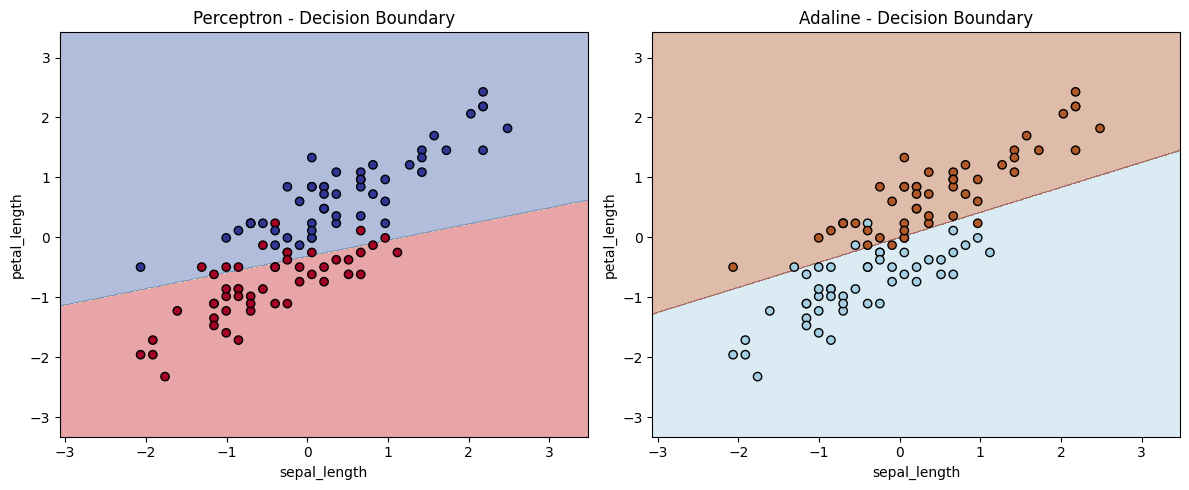

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset and select two classes and two features
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url, header=None, names=column_names)

# Let's select the classes 'Iris-versicolor' and 'Iris-virginica' and features 'sepal_length' and 'petal_length'
selected_classes = ['Iris-versicolor', 'Iris-virginica']
selected_features = ['sepal_length', 'petal_length']

# Filter the dataset to include only the selected classes and features
selected_data = iris_df[(iris_df['class'].isin(selected_classes))][['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']]

# Map class labels to 1 (Iris-virginica) and -1 (Iris-versicolor)
selected_data['class'] = np.where(selected_data['class'] == 'Iris-versicolor', -1, 1)

# Step 2: Implement Perceptron and Adaline models using gradient descent
class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.num_epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


class AdalineGD:
    def __init__(self, learning_rate=0.1, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []

        for _ in range(self.num_epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Step 3: Train both models on the selected data
X = selected_data[selected_features].to_numpy()
y = selected_data['class'].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

perceptron = Perceptron(learning_rate=0.1, num_epochs=10)
perceptron.fit(X, y)

adaline = AdalineGD(learning_rate=0.01, num_epochs=100)
adaline.fit(X, y)

# Step 4: Evaluate the accuracies of both models
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

perceptron_predictions = perceptron.predict(X)
adaline_predictions = adaline.predict(X)

perceptron_accuracy = accuracy(y, perceptron_predictions)
adaline_accuracy = accuracy(y, adaline_predictions)

print(f"Perceptron Accuracy: {perceptron_accuracy:.2%}")
print(f"Adaline Accuracy: {adaline_accuracy:.2%}")

# Plot decision boundaries for both models
plt.figure(figsize=(12, 5))

# Plot decision boundary for Perceptron
plt.subplot(1, 2, 1)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, marker='o', edgecolor='k')
plt.title('Perceptron - Decision Boundary')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

# Plot decision boundary for Adaline
plt.subplot(1, 2, 2)
Z = adaline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Change the colormap for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)  # You can use a different cmap here

# Change the colors for the scatter plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolor='k')  # You can use a different cmap here

plt.title('Adaline - Decision Boundary')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

plt.tight_layout()
plt.show()


In [2]:
# For 3 features: sepal_length, sepal_width, and petal_length
selected_features_3 = ['sepal_length', 'sepal_width', 'petal_length']

# For 4 features: sepal_length, sepal_width, petal_length, and petal_width
selected_features_4 = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Step 3: Train both models on the selected data with 3 features
X_3 = selected_data[selected_features_3].to_numpy()
X_3 = scaler.fit_transform(X_3)

perceptron_3 = Perceptron(learning_rate=0.1, num_epochs=10)
perceptron_3.fit(X_3, y)

adaline_3 = AdalineGD(learning_rate=0.001, num_epochs=1000)
adaline_3.fit(X_3, y)

# Step 4: Evaluate the accuracies of both models with 3 features
perceptron_predictions_3 = perceptron_3.predict(X_3)
adaline_predictions_3 = adaline_3.predict(X_3)

perceptron_accuracy_3 = accuracy(y, perceptron_predictions_3)
adaline_accuracy_3 = accuracy(y, adaline_predictions_3)

print("Results for 3 features:")
print(f"Perceptron Accuracy: {perceptron_accuracy_3:.2%}")
print(f"Adaline Accuracy: {adaline_accuracy_3:.2%}")

# Step 3: Train both models on the selected data with 4 features
X_4 = selected_data[selected_features_4].to_numpy()
X_4 = scaler.fit_transform(X_4)

perceptron_4 = Perceptron(learning_rate=0.1, num_epochs=10)
perceptron_4.fit(X_4, y)

adaline_4 = AdalineGD(learning_rate=0.001, num_epochs=1000)
adaline_4.fit(X_4, y)

# Step 4: Evaluate the accuracies of both models with 4 features
perceptron_predictions_4 = perceptron_4.predict(X_4)
adaline_predictions_4 = adaline_4.predict(X_4)

perceptron_accuracy_4 = accuracy(y, perceptron_predictions_4)
adaline_accuracy_4 = accuracy(y, adaline_predictions_4)

print("\nResults for 4 features:")
print(f"Perceptron Accuracy: {perceptron_accuracy_4:.2%}")
print(f"Adaline Accuracy: {adaline_accuracy_4:.2%}")


Results for 3 features:
Perceptron Accuracy: 90.00%
Adaline Accuracy: 93.00%

Results for 4 features:
Perceptron Accuracy: 96.00%
Adaline Accuracy: 97.00%
